# Clustering con Python y scikit-learn

## Primer clistering con sklearn

### Generación de los datos

In [3]:
from sklearn.datasets import make_blobs
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
x, y = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=[1,2.5,2,2], random_state=7)

In [5]:
df_blobs = pd.DataFrame({
    "x1": x[:,0],
    "x2": x[:,1],
    "y": y
})

In [6]:
df_blobs.head()

,x1,x2,y
0,-4.819224,5.723364,1
1,-1.836238,-7.735384,3
2,-7.456176,6.198874,0
3,-2.153862,-0.296621,1
4,-10.124910,6.133805,0


In [7]:
def plot_2d_clusters(x, y, ax):
    y_uniques = pd.Series(y).unique()

    for i in y_uniques:
        x[y==i].plot(
            title= f'{len(y_uniques)} Clusters',
            kind="scatter",
            x="x1",
            y="x2",
            marker=f'${i}$',
            ax=ax
        )

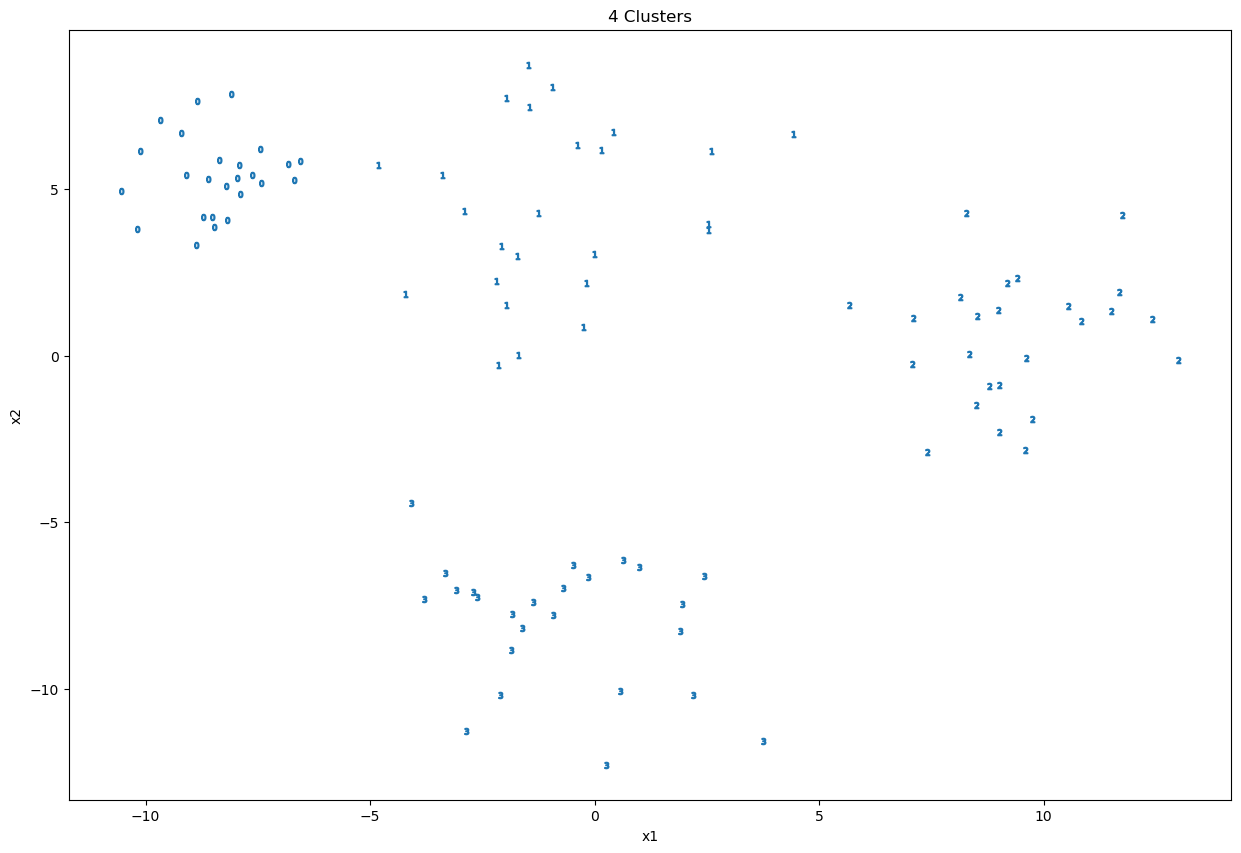

In [8]:
fig, ax = plt.subplots(1, 1 , figsize=(15, 10))
x, y = df_blobs[["x1", "x2"]], df_blobs["y"]
plot_2d_clusters(x, y, ax)

### Aplicando clustering

In [9]:
from sklearn.cluster import KMeans

In [10]:
kmeans = KMeans(n_clusters=4,random_state =7)

In [11]:
# entrenamiento
y_pred = kmeans.fit_predict(x)

In [12]:
y_pred

array([0, 3, 0, 2, 0, 2, 3, 1, 0, 3, 3, 1, 3, 0, 2, 3, 3, 1, 3, 0, 2, 0,
       0, 3, 1, 0, 1, 1, 3, 2, 3, 3, 2, 3, 3, 0, 1, 0, 2, 0, 3, 2, 2, 1,
       2, 1, 0, 0, 1, 0, 1, 3, 1, 3, 2, 0, 2, 3, 2, 2, 2, 3, 2, 1, 0, 1,
       0, 1, 1, 2, 0, 1, 0, 0, 1, 1, 1, 1, 3, 2, 2, 2, 0, 3, 1, 3, 1, 0,
       0, 2, 3, 2, 0, 3, 1, 1, 3, 2, 0, 2])

Text(0.5, 1.0, 'KMeans {axs[1].get_title()}')

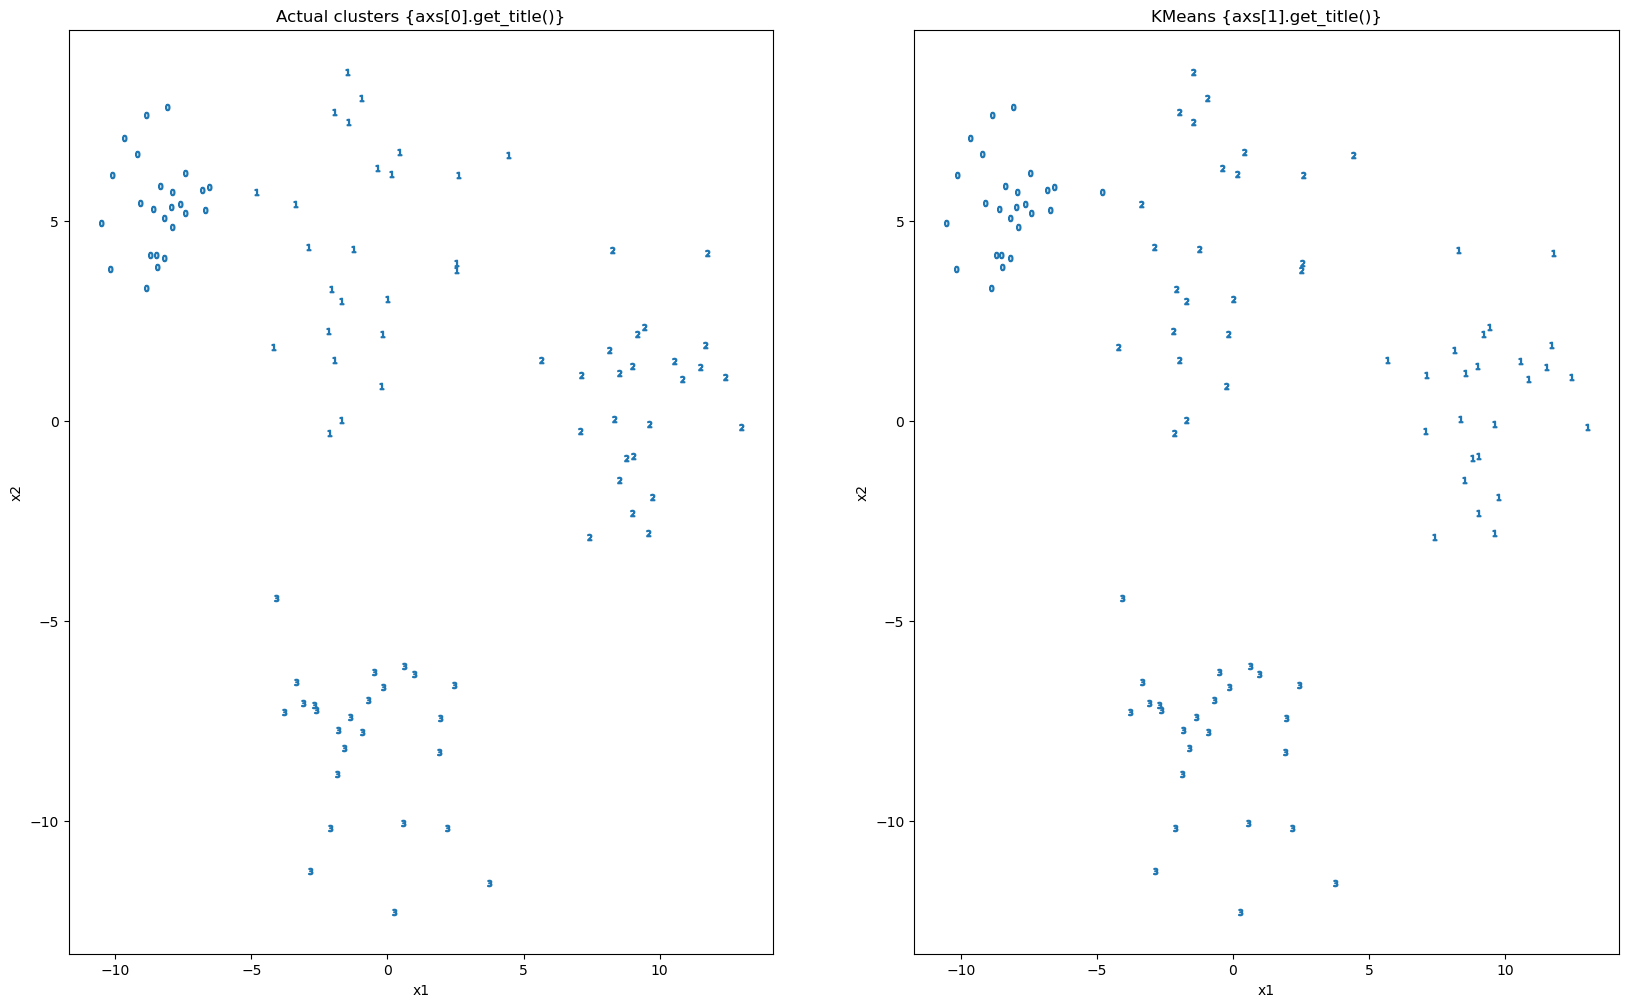

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(20,12))
plot_2d_clusters(x, y, ax[0])
plot_2d_clusters(x, y_pred, ax[1])

ax[0].set_title("Actual clusters {axs[0].get_title()}")
ax[1].set_title("KMeans {axs[1].get_title()}")

## Evaluación del modelo de clustering

### Coeficiente de silueta

$$
s(i) = \frac{b-a}{max(a, b)}
$$

Donde:

$a$ es promedio de distancias de la observacion $i$ con las otras observaciones de su cluster.

$b$ es la distancia minima a otro cluster que no esta $i$

<img src="img/silueta.png">

Cuanto mayor el valor de silueta más se diferencian los puntos de un cluster. Debe dar mayo a 0 el promedio de los valores de silueta (en la figura da 0.6)

## K-means

- se debe indicar cantidad de cluster, k
- ubicar centroides aleatorios
- cada punto se asigna al centroide más cercano
- recalcular centroides con el promedio
- repetir pasos hasta que no se muevan los centroides

$$
J = \sum_{j=1}^{k}\sum_{i=1}^{n} \quad \big\| x_{i}^{(j)} - c_{j} \big\|^{2}
$$

Donde:

- $k$, numero de clusters
- $n$, numero de casos
- $x_{i}$ caso particualar
- $c_{j}$ centroide del cluster $j$

In [14]:
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
#from yellowbrick.cluster import SilhoutteVisualizer

### Preparando los datos

In [15]:
x, y, c = make_blobs(500, cluster_std= 0.8, centers=4, n_features=2, return_centers=True, random_state=7)

In [16]:
df_blobs = pd.DataFrame({
    "x1": x[:,0],
    "x2": x[:,1],
    "y":y
})

In [17]:
df_centers =  pd.DataFrame({
    "x1": c[:,0],
    "x2": c[:,1]
})

### Visualización de datos

<AxesSubplot:xlabel='x1', ylabel='x2'>

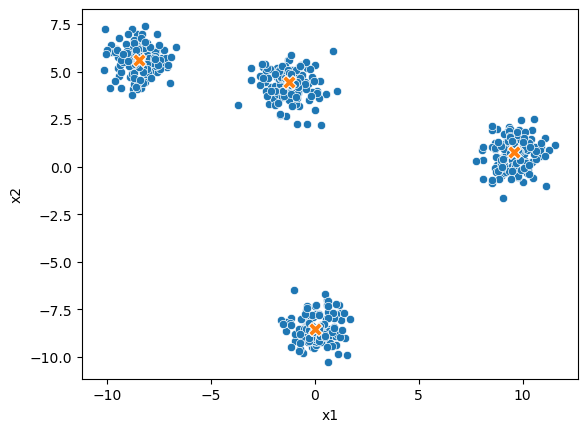

In [18]:
sns.scatterplot(data=df_blobs, x="x1", y="x2")
sns.scatterplot(data=df_centers, x="x1", y="x2", marker="X", s=100)

### Aplicando k-means

In [19]:
kmeans = KMeans(n_clusters=3)
df_cluster = kmeans.fit_predict(x)
df_blobs["cluster"] = df_cluster
k_means_centers = kmeans.cluster_centers_
df_k_means_center = pd.DataFrame(
    {
        "x1": k_means_centers[:,0],
        "x2": k_means_centers[:,1]
    }
) 

<AxesSubplot:xlabel='x1', ylabel='x2'>

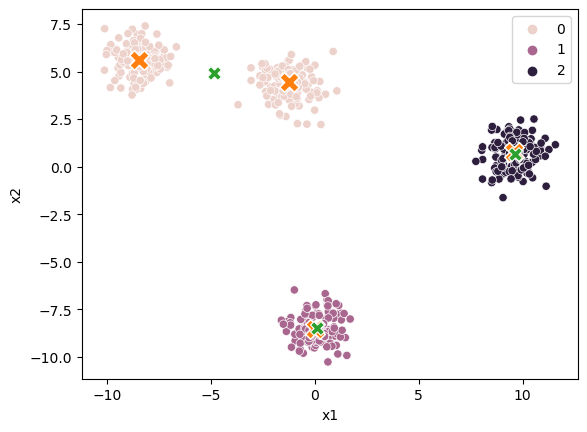

In [20]:
sns.scatterplot(data=df_blobs, x="x1", y="x2", hue="cluster")
sns.scatterplot(data=df_centers, x="x1", y="x2", marker="X", s=200)
sns.scatterplot(data=df_k_means_center, x="x1", y="x2", marker="X", s=100)

Para determinar el número de clusters a asignar un método puede ser el Método del codo (Elbow):

WCSS(Within-Cluster Sum of Square)

$$
WCSS(C_{j})= \sum_{p_{i}=1  \epsilon  C_{j}}^{p_{m}} distance(C_{j}, p_{i})^2
$$

Además se puede usar el coeficiente de silueta variando k

In [21]:
def vis_cluster(k):
    kmeans = KMeans(n_clusters=k)
    df_cluster = kmeans.fit_predict(x)
    df_blobs["cluster"] = df_cluster
    k_means_centers = kmeans.cluster_centers_
    df_k_means_center = pd.DataFrame(
        {
            "x1": k_means_centers[:,0],
            "x2": k_means_centers[:,1]
        }
    ) 

    fig = plt.figure(figsize=(9,9))
    sns.scatterplot(data=df_blobs, x="x1", y="x2", hue="cluster")
    sns.scatterplot(data=df_centers, x="x1", y="x2", marker="X", s=200)
    sns.scatterplot(data=df_k_means_center, x="x1", y="x2", marker="X", s=100)
    plt.show()

3


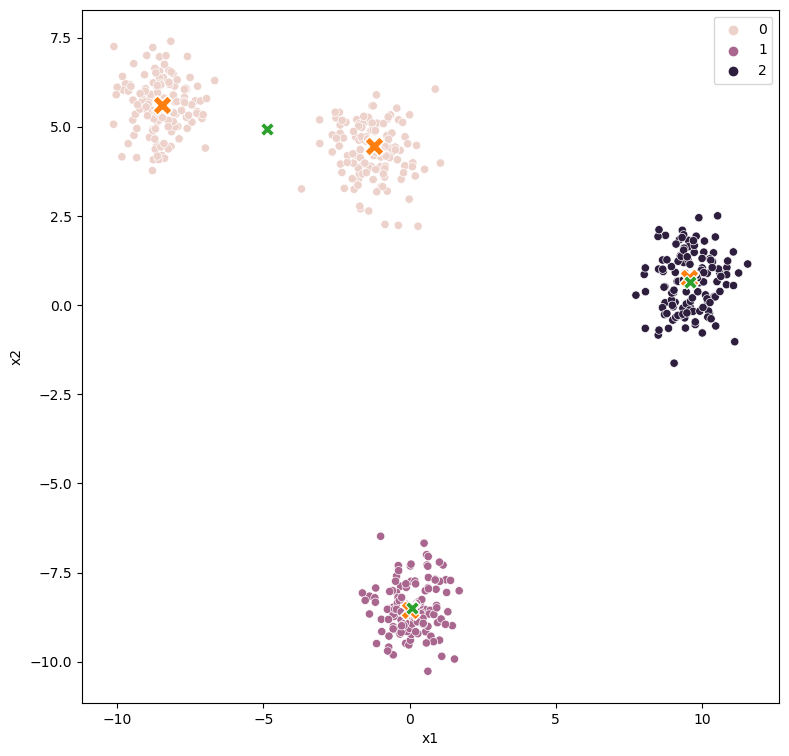

4


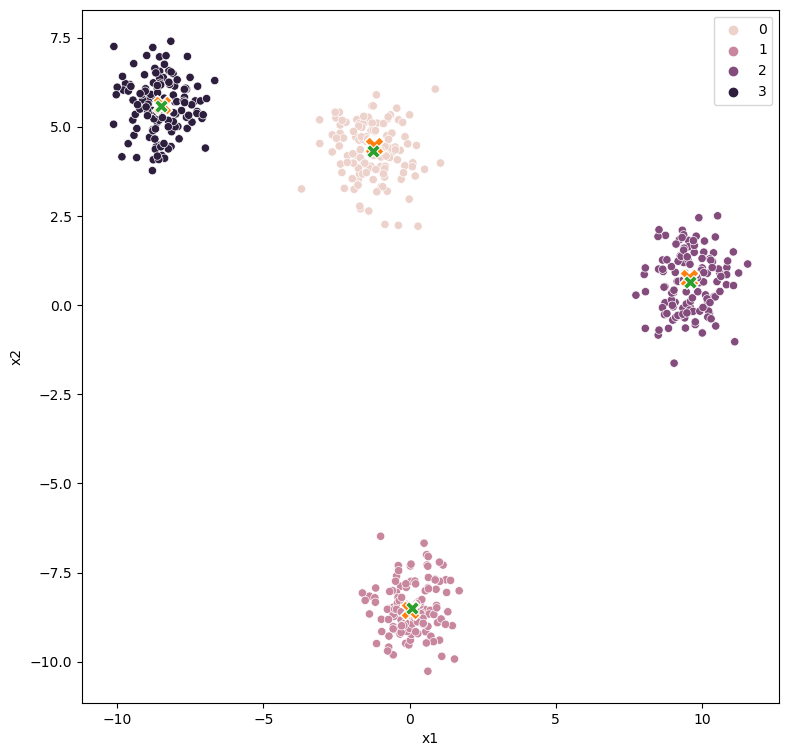

5


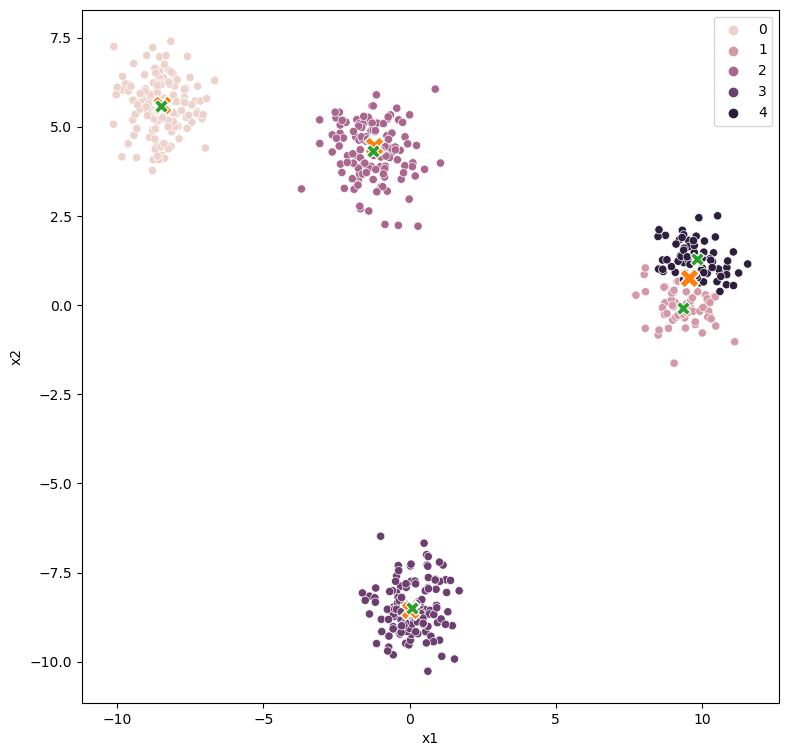

6


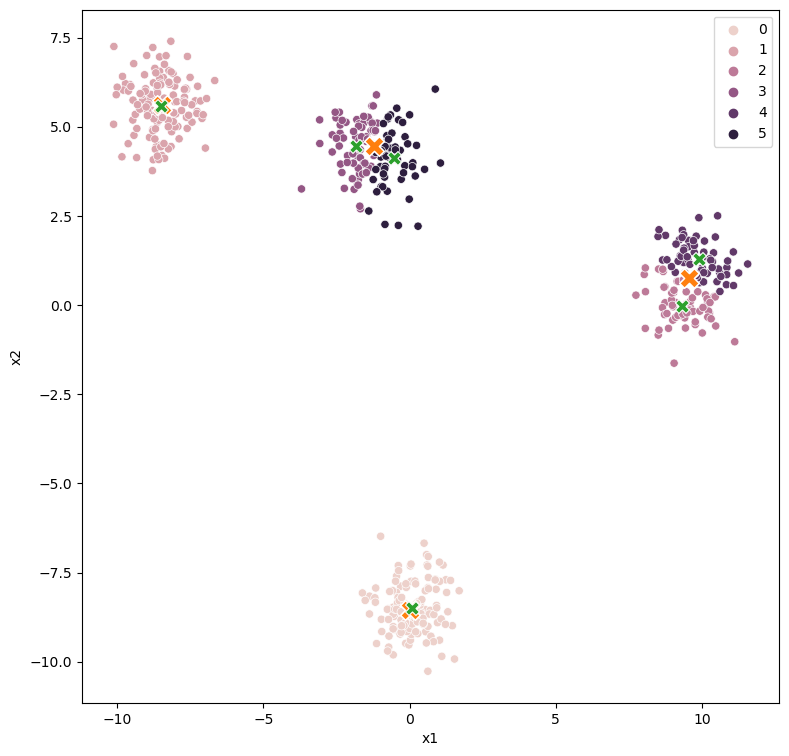

In [22]:
for _ in range(3, 7):
    print(_)
    vis_cluster(_)

Text(0, 0.5, 'Inertia')

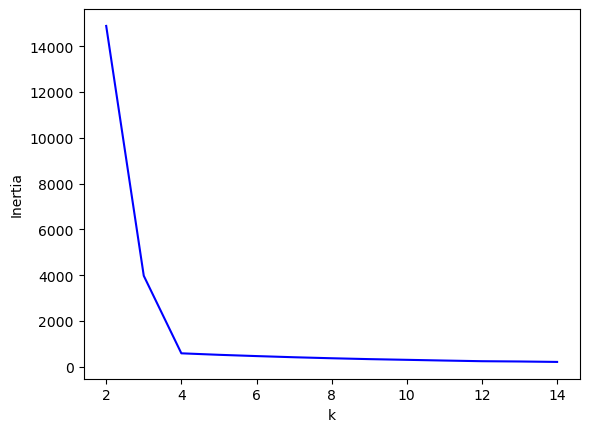

In [23]:
sum_of_squared_distances = []
K = range(2, 15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(x)
    sum_of_squared_distances.append(km.inertia_)

plt.plot(K, sum_of_squared_distances, "b-")
plt.xlabel("k")
plt.ylabel("Inertia")

Text(0, 0.5, 'silhouette_scores')

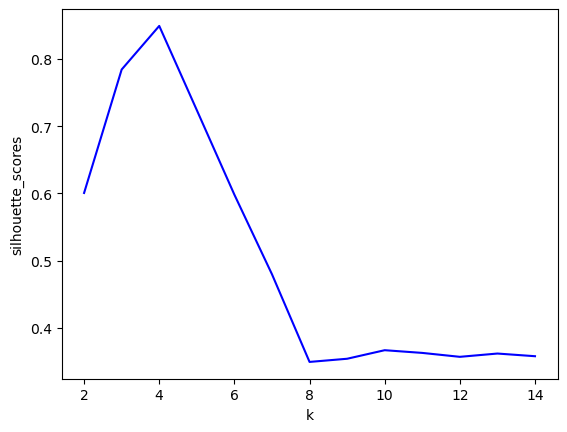

In [24]:
silhouette_scores = []
K = range(2, 15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(x)
    y = km.predict(x)
    silhouette_scores.append(silhouette_score(x, y))

plt.plot(K, silhouette_scores, "b-")
plt.xlabel("k")
plt.ylabel("silhouette_scores")

# Hierarchical Clustering

Tipos:

- clustering aglomerativo
- clustering divisivo

Linkage:forma de medir distancia entre los datasets.

- simple: entre los datapoints más cercanos
- complete: entre los datapoints más lejanos
- promedio: entre el promedio de los datapoints
- ward: es el mejor, considera la desviación


In [25]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [27]:
df_blobs.head()

,x1,x2,y,cluster
0,-0.320970,4.338705,1,5
1,-2.231586,3.271233,1,3
2,-8.559968,4.477236,0,1
3,0.111800,3.987295,1,5
4,-0.557967,-9.808574,3,0


In [28]:
df_centers

,x1,x2
0,-8.473834,5.598376
1,-1.231815,4.469304
2,9.559790,0.769917
3,0.022409,-8.558977


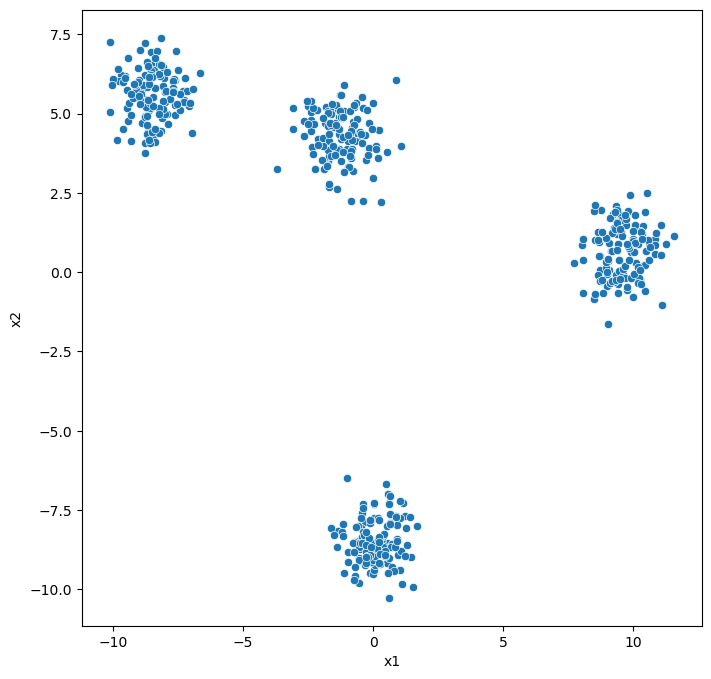

In [31]:
fig = plt.figure(figsize=(8,8))
sns.scatterplot(data=df_blobs, x="x1", y="x2")
plt.show()

### Dendrograma

Text(0, 0.5, 'Distancia Eucliidea')

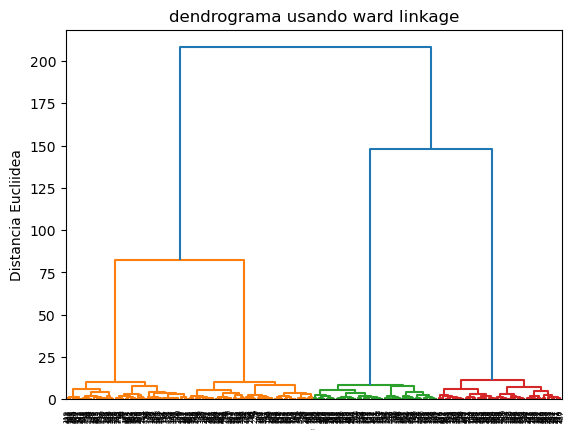

In [34]:
dendrogram_plot = dendrogram(linkage(x, method="ward"))
plt.title("dendrograma usando ward linkage")
plt.xlabel("Cluster", fontsize=1)
plt.ylabel("Distancia Eucliidea")

In [35]:
hc = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="ward")
y_hc = hc.fit_predict(x)

In [37]:
df_blobs["cluster"] = y_hc

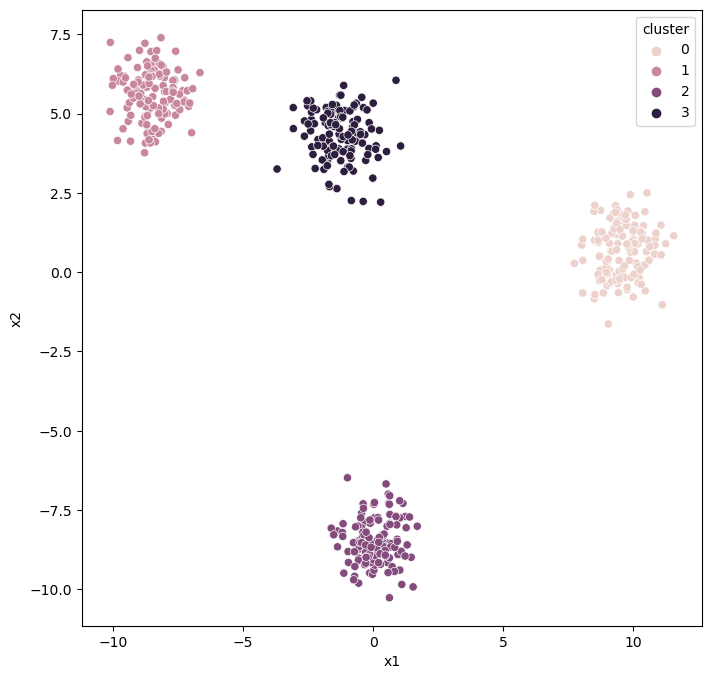

In [38]:
fig = plt.figure(figsize=(8,8))
sns.scatterplot(data=df_blobs, x="x1", y="x2", hue="cluster")
plt.show()

# DBSCAN
Analiza cuantos vecinos tiene cada datapoint

Parámetros:
- Eps (epsilon): radio del circulo
- MinPts (mínimo de puntos)

In [40]:
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [41]:
x_m, y_m = make_moons(n_samples=250, noise=0.05, random_state=42)

df_moons = pd.DataFrame({
    "x1": x_m[:,0],
    "x2": x_m[:,1]
})

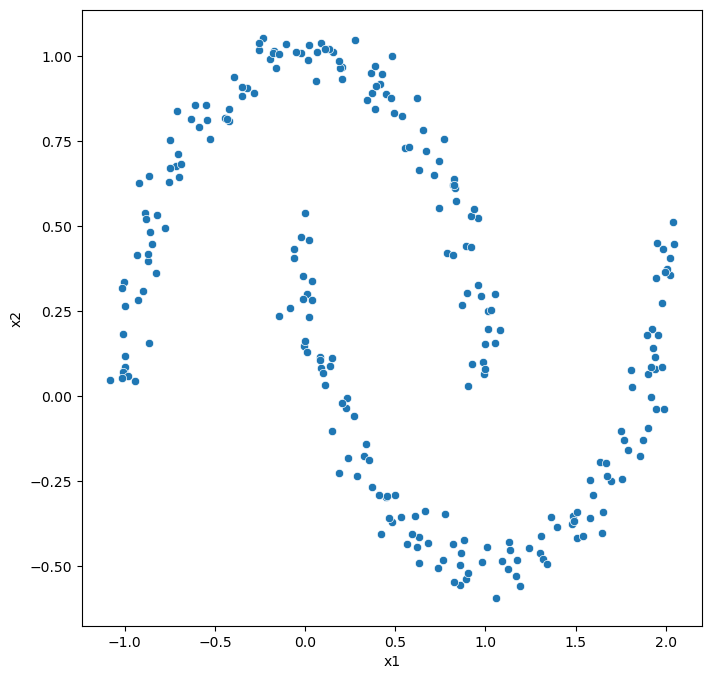

In [43]:
fig = plt.figure(figsize=(8,8))
sns.scatterplot(data=df_moons, x="x1", y="x2")
plt.show()

In [62]:
dbscan_cluster = DBSCAN(eps=0.135, min_samples=3)
y_m_predict = dbscan_cluster.fit_predict(x_m)

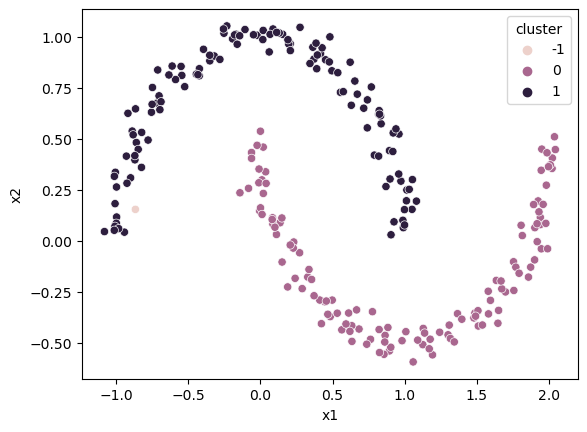

In [63]:
df_moons["cluster"] = y_m_predict
sns.scatterplot(data=df_moons, x="x1", y="x2", hue="cluster")
plt.show()

### Hiperparámetros

In [69]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

In [70]:
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(x)
distances, indices = neighbors_fit.kneighbors(x)

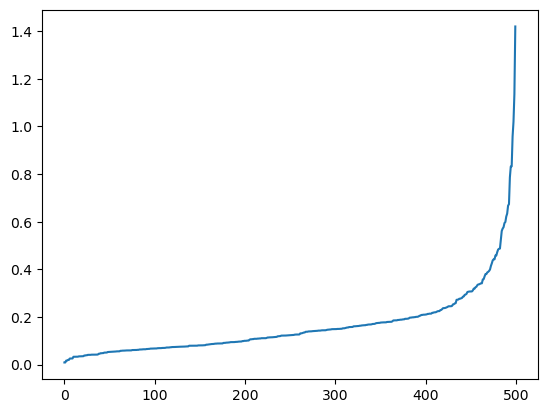

In [71]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [72]:
eps_values = np.arange(0.25, 0.8, 0.10)
min_samples = np.arange(2, 10)

In [73]:
from itertools import product

In [76]:
dbscan_params = list(product(eps_values, min_samples))
sil_scores = []

for p in dbscan_params:
    y_pred = DBSCAN(eps = p[0], min_samples=p[1]).fit_predict(x)
    sil_scores.append(silhouette_score(x, y_pred))

In [77]:
sil_scores

[-0.04626430983180965,
 -0.03776436618732885,
 -0.04102205509567253,
 -0.17342036379493134,
 -0.17911734548852126,
 -0.40419093789653643,
 -0.5726618753832947,
 -0.3372803036223066,
 0.22709659780543517,
 0.2842132996464689,
 0.4021565502029113,
 0.37152980862538254,
 0.3128680248300817,
 0.1221701798132507,
 0.22980842672254798,
 0.0942033888604588,
 0.3686727206252272,
 0.6385656975402313,
 0.7502798071604806,
 0.5911065110564607,
 0.5779327671656456,
 0.683998375012153,
 0.6395622306932359,
 0.6170533477781548,
 0.7011598239764953,
 0.7954065789922368,
 0.7925049208523407,
 0.7790993788283957,
 0.7685789149551652,
 0.7650811094873036,
 0.7579442197483849,
 0.7463236298035953,
 0.715040663598921,
 0.8144216591759345,
 0.8144216591759345,
 0.8144216591759345,
 0.8065824885714977,
 0.7972789487392373,
 0.7972789487392373,
 0.7848711580688842,
 0.828415598462898,
 0.828415598462898,
 0.8188389239038697,
 0.8188389239038697,
 0.8137319484136747,
 0.8137319484136747,
 0.8124198129146035,


In [79]:
df_params_tunning = pd.DataFrame.from_records(dbscan_params, columns=["Eps", "Min_samples"])
df_params_tunning["sil_scores"]=sil_scores

In [83]:
pivot_data = pd.pivot_table(df_params_tunning, values="sil_scores", index="Min_samples", columns="Eps")

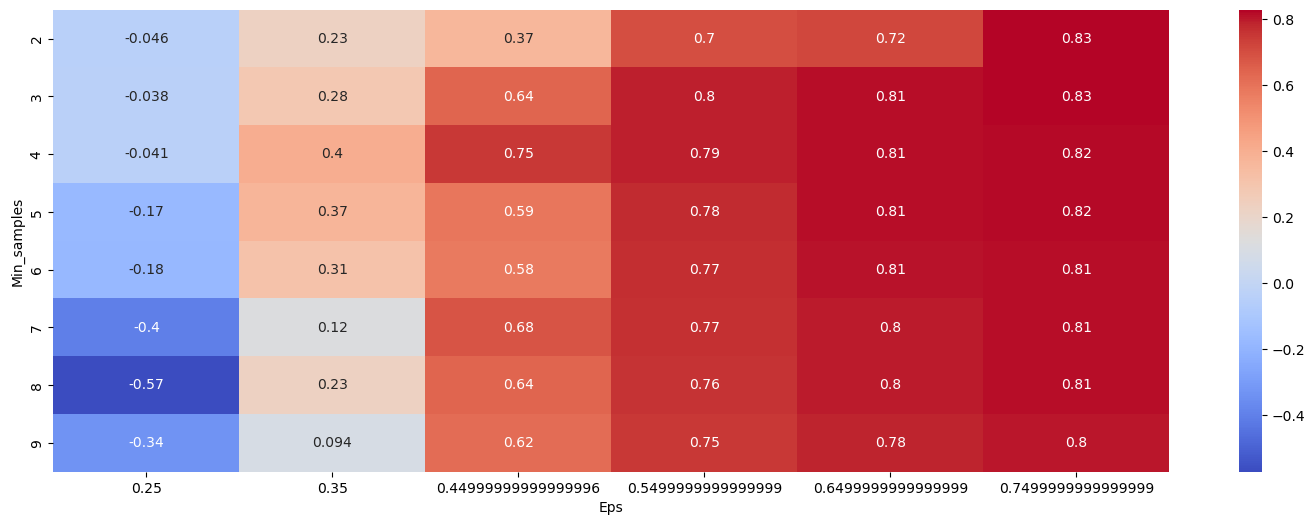

In [86]:
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_data, annot=True, annot_kws={"size":10}, ax=ax, cmap="coolwarm")
plt.show()

In [88]:
dbscan_cluster = DBSCAN(eps=0.5, min_samples=3)
y_predict = dbscan_cluster.fit_predict(x)
df_blobs["cluster"] = y_predict

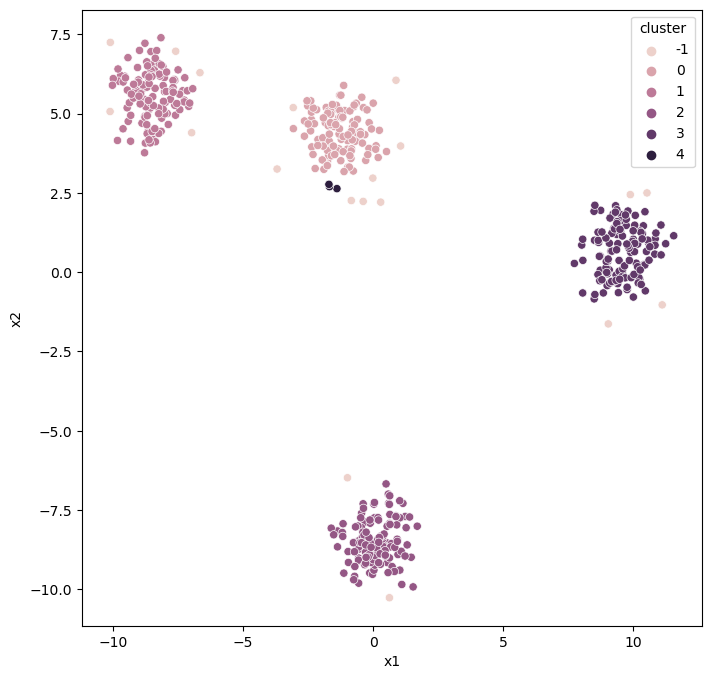

In [90]:
fig = plt.figure(figsize=(8,8))
sns.scatterplot(data=df_blobs, x="x1", y="x2", hue="cluster")
plt.show()